In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifier_selector import Classifier_selector
from sbs import SequentialBackwardSelection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from mpa import mpa
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
# Completely disable PyTorch warnings
import os
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"

In [2]:
''' Testing phase '''

' Testing phase '

In [3]:
classifier_selecting = Classifier_selector()

In [4]:
ion_df = pd.read_csv("./Datasets/ionosphere.csv", header = None)
num_features = ion_df.shape[1] - 1  # Assuming the last column is the label
feature_names = [f'feature{i+1}' for i in range(num_features)] + ['label']
ion_df.columns = feature_names
dict1 = {'g':0,'b':1}
ion_df = ion_df.replace({'label':dict1})
ion_df['label'] = ion_df['label'].apply(pd.to_numeric, errors = 'coerce')

/tmp/ipykernel_39242/3423510681.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ion_df = ion_df.replace({'label':dict1})


In [5]:
ion_df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [6]:
ion_df.drop("feature2", axis = 1, inplace = True)

In [7]:
train_df, test_df = train_test_split(ion_df, test_size = 0.2, random_state = 11)
X_train = train_df.drop("label", axis = 1)
y_train = train_df["label"]
X_test = test_df.drop("label", axis = 1)
y_test = test_df["label"]

In [8]:
train_df.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
239,1,0.61857,0.10850,0.70694,-0.06935,0.70358,0.01678,0.74273,0.00224,0.71029,...,-0.09508,0.69845,-0.01673,0.63311,0.04810,0.78859,-0.05145,0.65213,-0.04698,0
74,1,1.00000,0.05070,1.00000,0.10827,1.00000,0.19498,1.00000,0.28453,1.0,...,0.63942,0.59417,0.69435,0.49538,0.72684,0.47027,0.71689,0.33381,0.75243,0
102,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1
314,1,0.79378,0.29492,0.64064,0.52312,0.41319,0.68158,0.14177,0.83548,-0.16831,...,-0.52540,0.01523,-0.48707,0.19030,-0.38059,0.31008,-0.23199,0.34572,-0.08036,0
193,1,1.00000,0.05149,0.99363,0.10123,0.96142,0.14756,0.95513,-0.26496,0.66026,...,0.27226,0.32930,0.25553,0.27381,0.23568,0.22427,0.21378,0.18086,0.19083,0


In [9]:
# Clean the data before scaling
def clean_numeric_data(X):
    # Convert to DataFrame if not already
    X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X

    # Fix malformed numbers and convert to float
    for col in X.columns:
        X[col] = X[col].apply(lambda x: str(x).split('.')[0] + '.' + str(x).split('.')[1]
                             if isinstance(x, str) and x.count('.') > 1
                             else x).astype(float)
    return X

X_train = clean_numeric_data(X_train)
X_test = clean_numeric_data(X_test)

n_jobs = -1
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

Best Cross-validation Score: 0.822963591229845

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        45
           1       0.95      0.73      0.83        26

    accuracy                           0.89        71
   macro avg       0.91      0.85      0.87        71
weighted avg       0.89      0.89      0.88        71



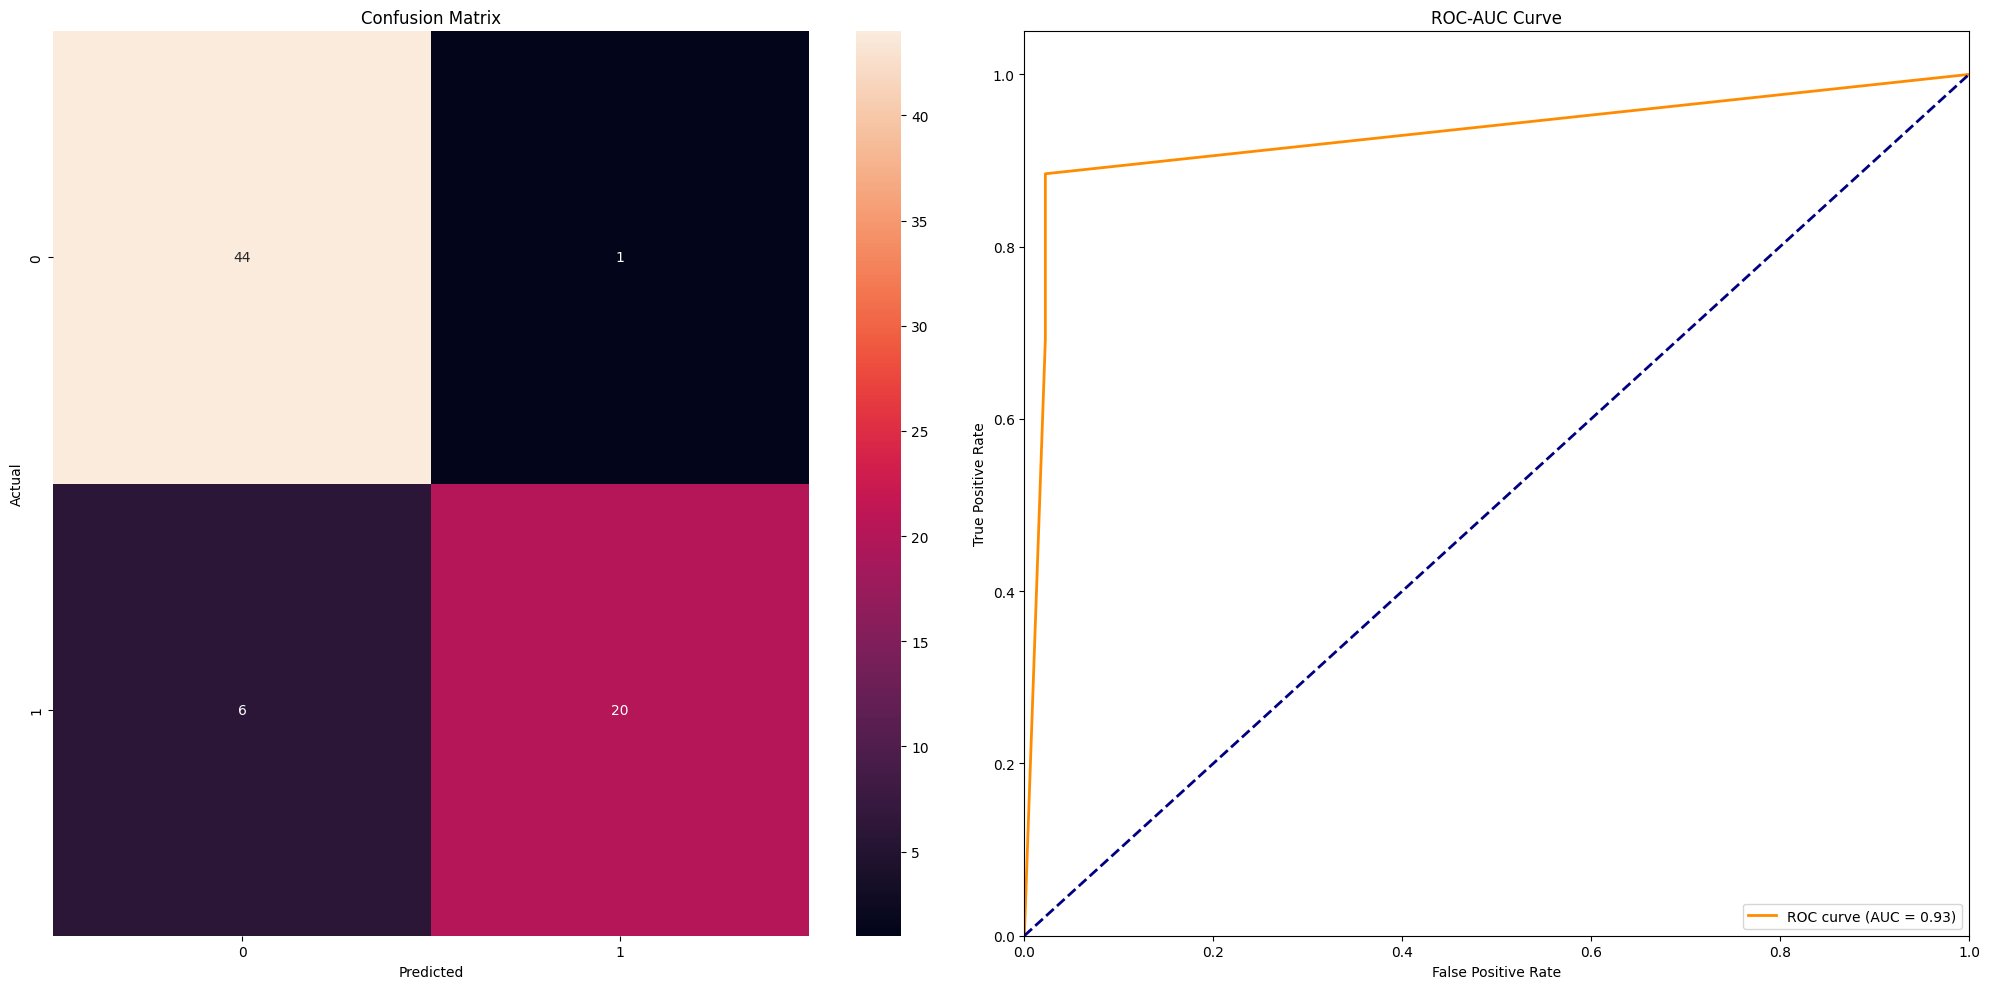

In [10]:
results_knn = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'knn')

print("\nBest Parameters:", results_knn['best_parameters'])
print("\nBest Cross-validation Score:", results_knn['best_score'])
print("\nFeature Importances:", results_knn['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_knn['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [11]:
knn = KNeighborsClassifier(**results_knn['best_parameters'])

sbs_knn = SequentialBackwardSelection(estimator=knn,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_knn.fit(X_train, X_test, y_train, y_test)


Removed feature: feature22
Current performance: 0.91549
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature9
Current performance: 0.91549
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature6
Current perf

n_jobs = -1
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/home/soulangel443/.local/share/mise/installs/python/latest/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters: {'validation_fraction': 0.1, 'tol': 0.001, 'penalty': None, 'max_iter': 500, 'early_stopping': True, 'alpha': 0.0001}

Best Cross-validation Score: 0.7962685550384384

Feature Importances: {'feature1': 21.246489906178233, 'feature3': 7.868210887091957, 'feature4': 1.2040516297762114, 'feature5': 7.618987034418446, 'feature6': 11.015234519719519, 'feature7': 3.6300873687528132, 'feature8': 7.145717463682955, 'feature9': 4.8509778259663, 'feature10': 2.5486944834805607, 'feature11': 2.450843153997048, 'feature12': 3.4995701752806507, 'feature13': 1.6862384616419068, 'feature14': 2.7526473534018825, 'feature15': 9.874252765166073, 'feature16': 4.274687407963706, 'feature17': 4.157741077877158, 'feature18': 0.9638656183366122, 'feature19': 1.7021176918567977, 'feature20': 2.2594791798259934, 'feature21': 1.1004153041067848, 'feature22': 8.327084092169715, 'feature23': 3.8210289511144055, 'feature24': 1.5127138981653674, 'feature25': 1.858195797998929, 'feature26': 0.04946

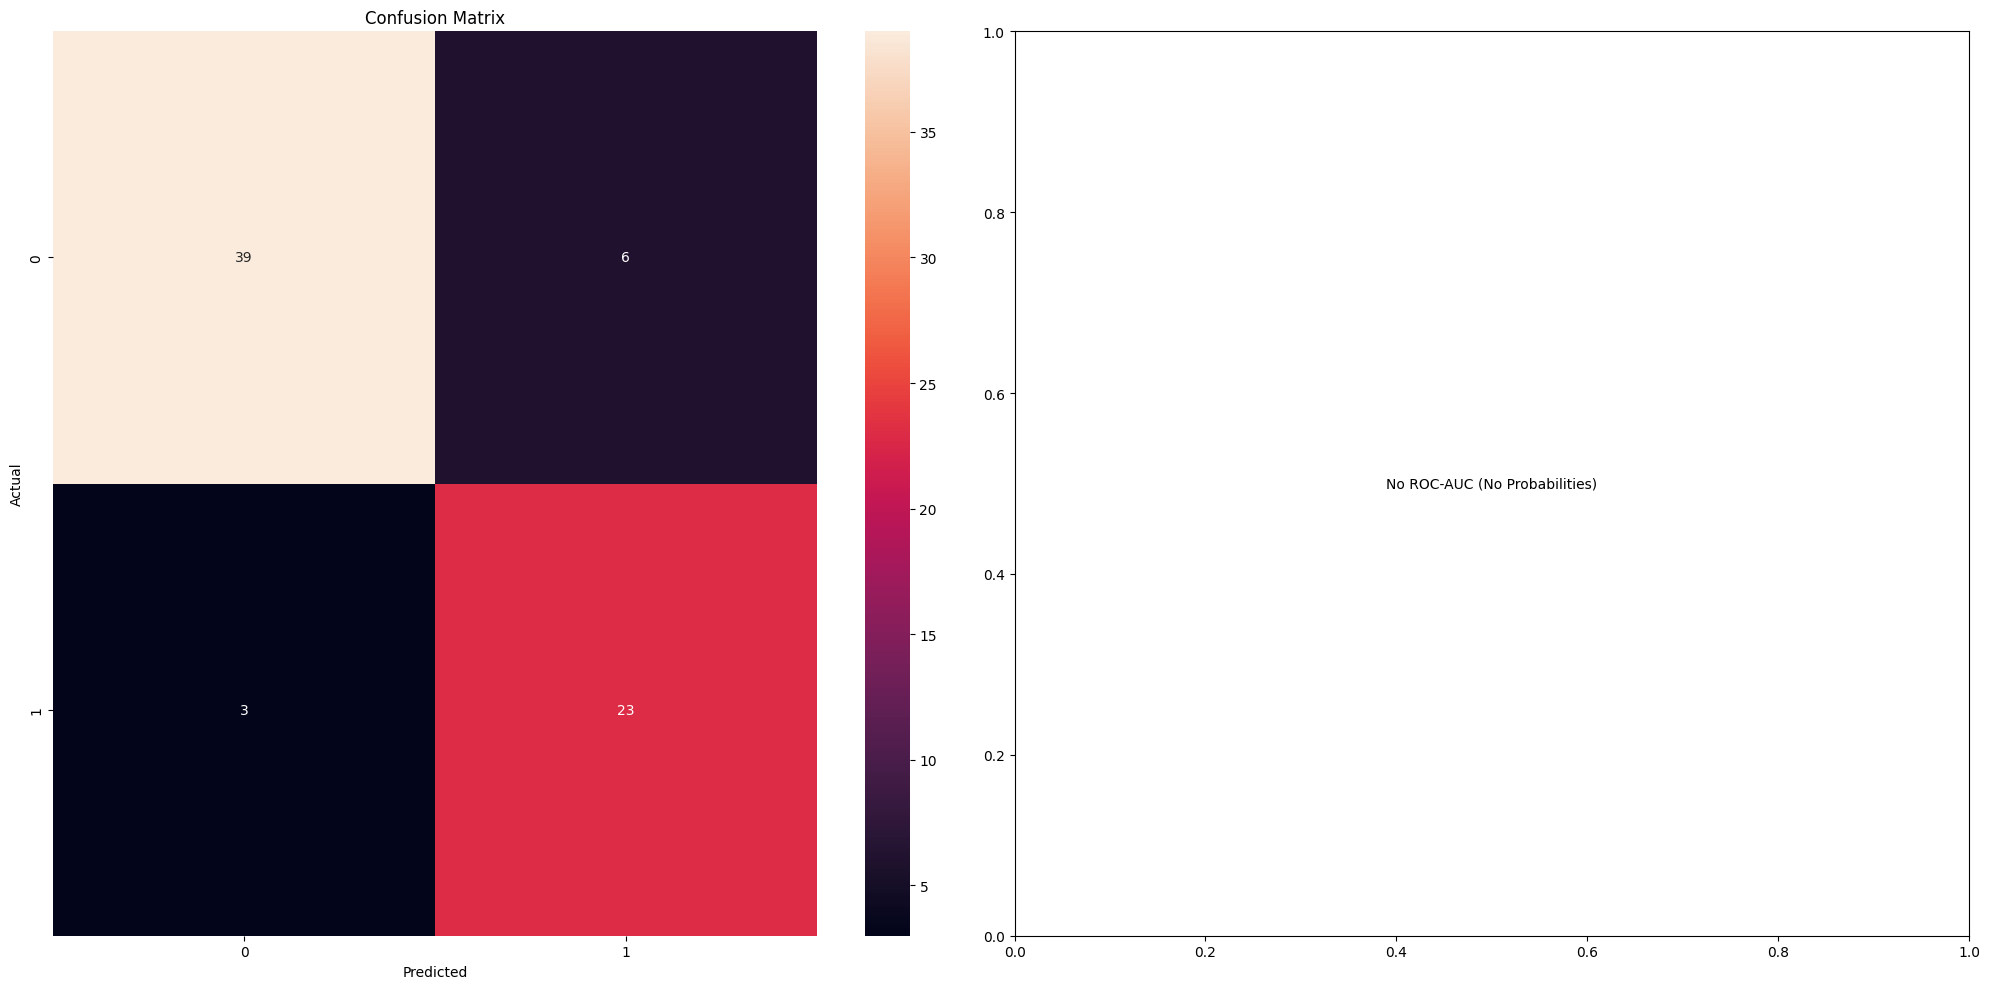

In [12]:
results_perceptron = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'perceptron')

print("\nBest Parameters:", results_perceptron['best_parameters'])
print("\nBest Cross-validation Score:", results_perceptron['best_score'])
print("\nFeature Importances:", results_perceptron['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_perceptron['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [13]:
perceptron = Perceptron(**results_perceptron['best_parameters'])

sbs_perceptron = SequentialBackwardSelection(estimator=perceptron,
                                             min_features = 3,
                                             scoring_metric=accuracy_score,
                                             scale_features=True,
                                             verbose=True)
sbs_perceptron.fit(X_train, X_test, y_train, y_test)


Removed feature: feature23
Current performance: 0.94366
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature26
Current performance: 0.94366
Remaining features: ['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature24', 'feature25', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature8
Current perf

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Best Cross-validation Score: 0.916550315497684

Feature Importances: {'feature1': 0.027754252500275654, 'feature3': 0.07488445667292588, 'feature4': 0.03193396666137687, 'feature5': 0.1200955918337283, 'feature6': 0.033717951812921004, 'feature7': 0.10365225040269048, 'feature8': 0.03983705628005423, 'feature9': 0.016943400225633724, 'feature10': 0.013209642349749867, 'feature11': 0.011815131342827207, 'feature12': 0.024120285388913226, 'feature13': 0.014025729292575782, 'feature14': 0.02730777872193756, 'feature15': 0.021995255557567785, 'feature16': 0.02197791047294534, 'feature17': 0.018464960753568616, 'feature18': 0.016075869395645374, 'feature19': 0.01189857765844477, 'feature20': 0.012481518747391505, 'featur

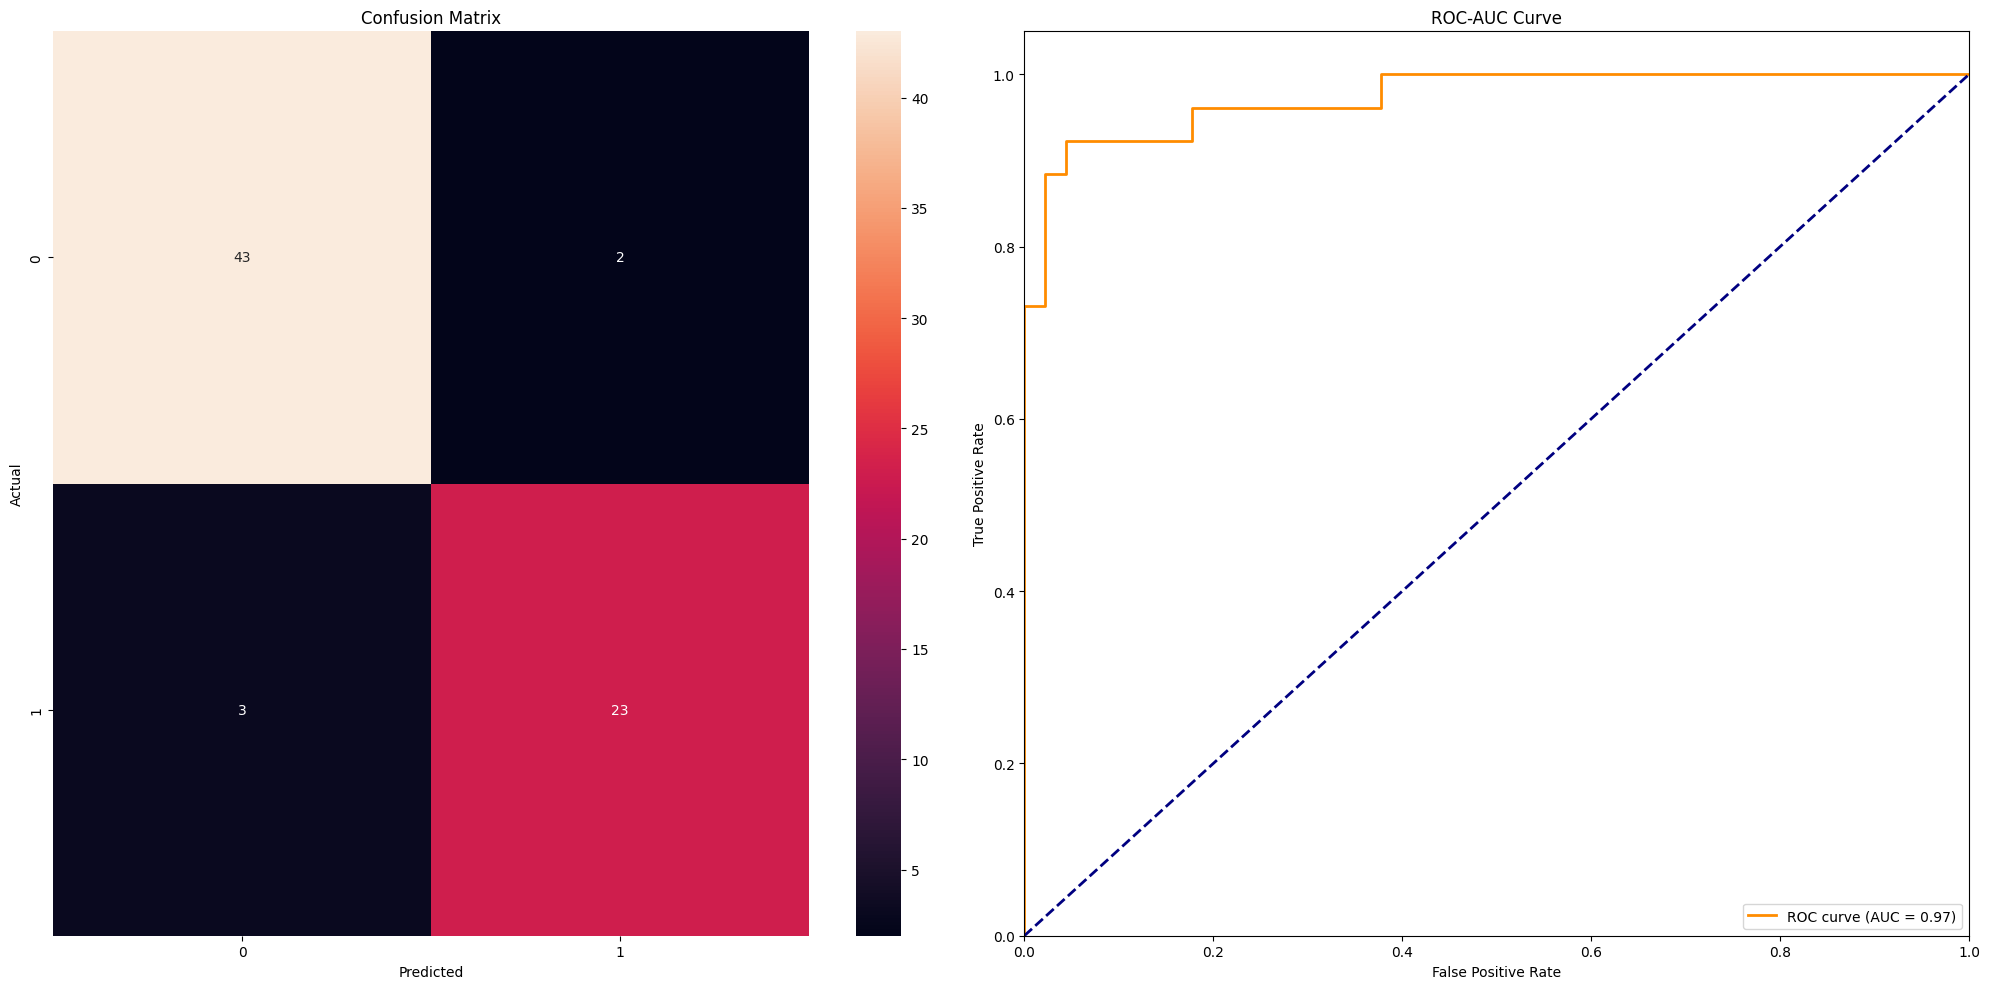

In [14]:
results_rf = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'rf')

print("\nBest Parameters:", results_rf['best_parameters'])
print("\nBest Cross-validation Score:", results_rf['best_score'])
print("\nFeature Importances:", results_rf['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_rf['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [15]:
rf = RandomForestClassifier(**results_rf['best_parameters'])

sbs_rf = SequentialBackwardSelection(estimator=rf,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_rf.fit(X_train, X_test, y_train, y_test)


Removed feature: feature1
Current performance: 0.94366
Remaining features: ['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature3
Current performance: 0.94366
Remaining features: ['feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34']


Removed feature: feature5
Current per

KeyboardInterrupt: 

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 8, 'min_impurity_decrease': 0.05, 'max_features': None, 'max_depth': 50, 'criterion': 'gini', 'class_weight': None}

Best Cross-validation Score: 0.86818845069166

Feature Importances: {'feature1': 0.0, 'feature3': 0.0, 'feature4': 0.0, 'feature5': 0.6345814431388, 'feature6': 0.0, 'feature7': 0.0, 'feature8': 0.0, 'feature9': 0.0, 'feature10': 0.0, 'feature11': 0.0, 'feature12': 0.0, 'feature13': 0.0, 'feature14': 0.0, 'feature15': 0.0, 'feature16': 0.0, 'feature17': 0.0, 'feature18': 0.0, 'feature19': 0.0, 'feature20': 0.0, 'feature21': 0.0, 'feature22': 0.0, 'feature23': 0.0, 'feature24': 0.0, 'feature25': 0.0, 'feature26': 0.0, 'feature27': 0.3654185568612, 'feature28': 0.0, 'feature29': 0.0, 'feature30': 0.0, 'feature31': 0.0, 'feature32': 0.0, 'feature33': 0.0, 'feature34': 0.0}

Classification Report:
              precisio

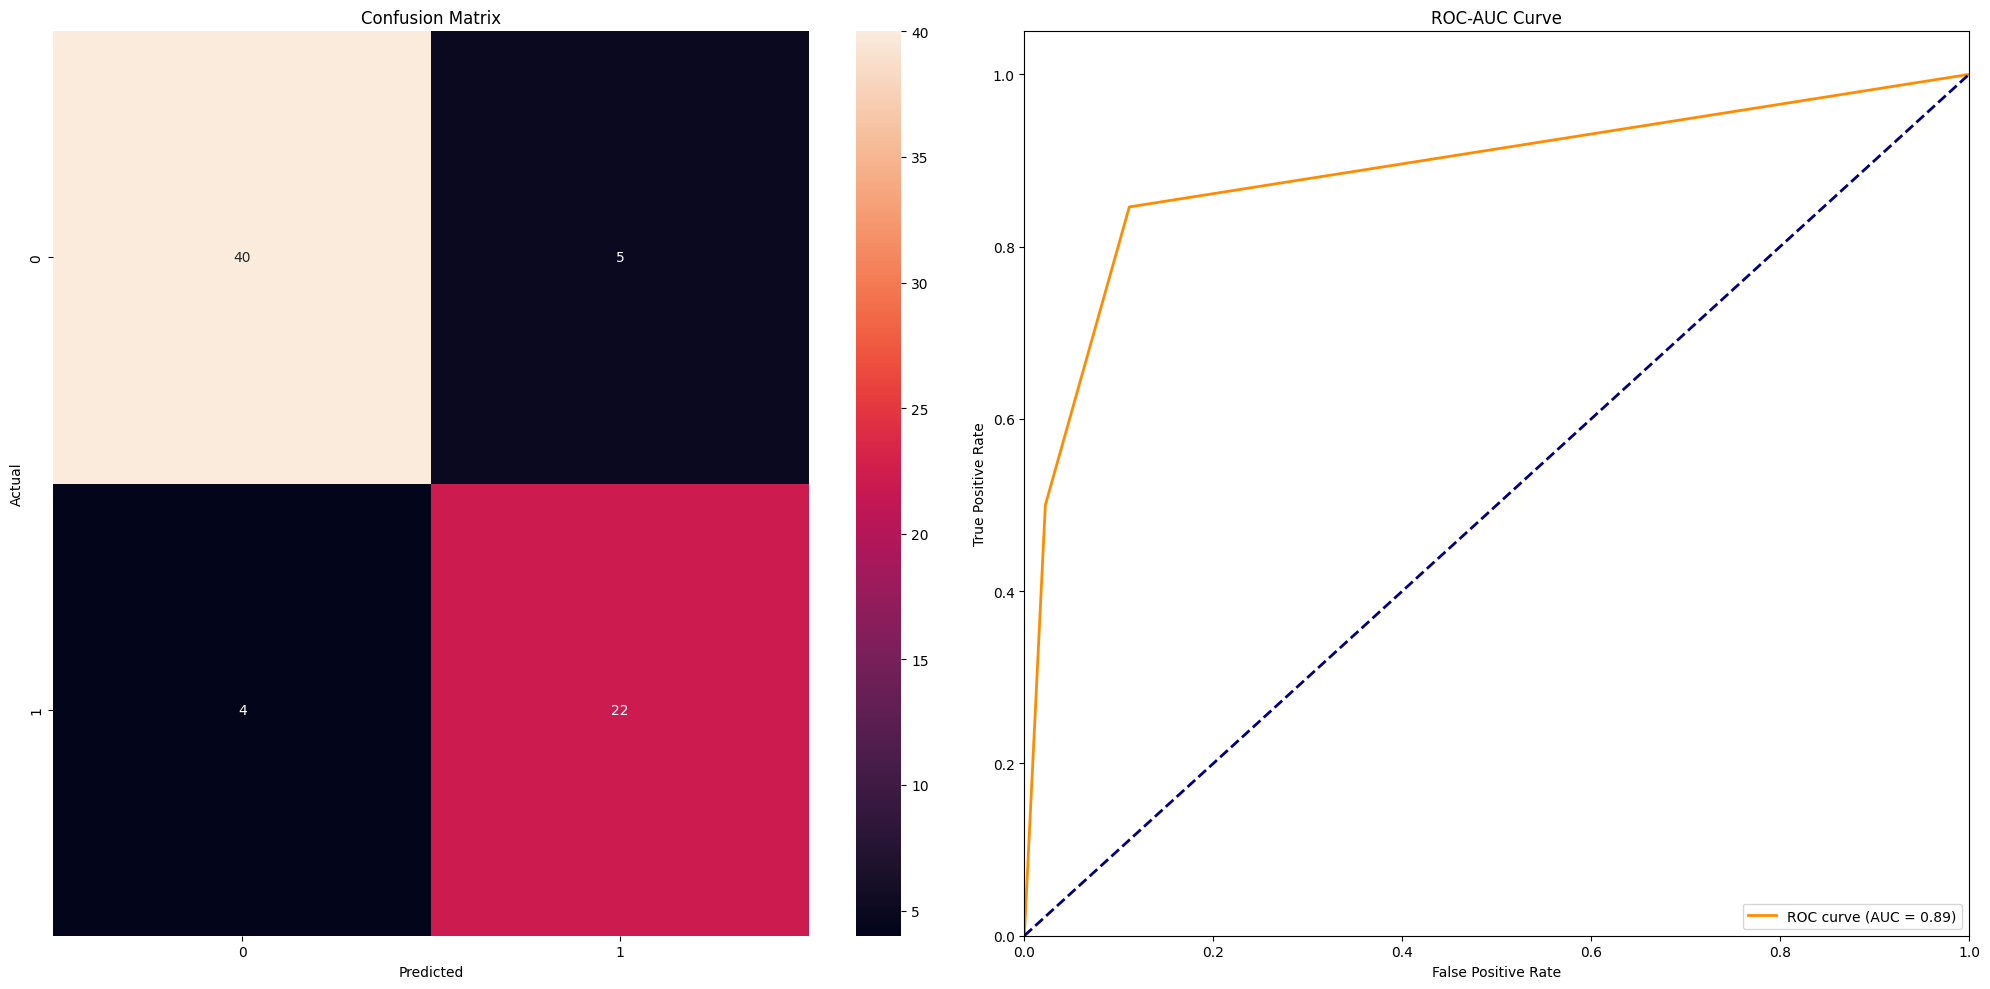

In [16]:
results_dt = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'dt')

print("\nBest Parameters:", results_dt['best_parameters'])
print("\nBest Cross-validation Score:", results_dt['best_score'])
print("\nFeature Importances:", results_dt['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_dt['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [ ]:
dt = DecisionTreeClassifier(**results_dt['best_parameters'])

sbs_dt = SequentialBackwardSelection(estimator=dt,
                                     min_features = 3,
                                     scoring_metric=accuracy_score,
                                     scale_features=True,
                                     verbose=True)
sbs_dt.fit(X_train, X_test, y_train, y_test)

n_jobs = -1
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 3, 'coef0': 0.0, 'class_weight': 'balanced', 'C': 10}

Best Cross-validation Score: 0.9330364372469635

Feature Importances: None

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.96      0.85      0.90        26

    accuracy                           0.93        71
   macro avg       0.94      0.91      0.92        71
weighted avg       0.93      0.93      0.93        71



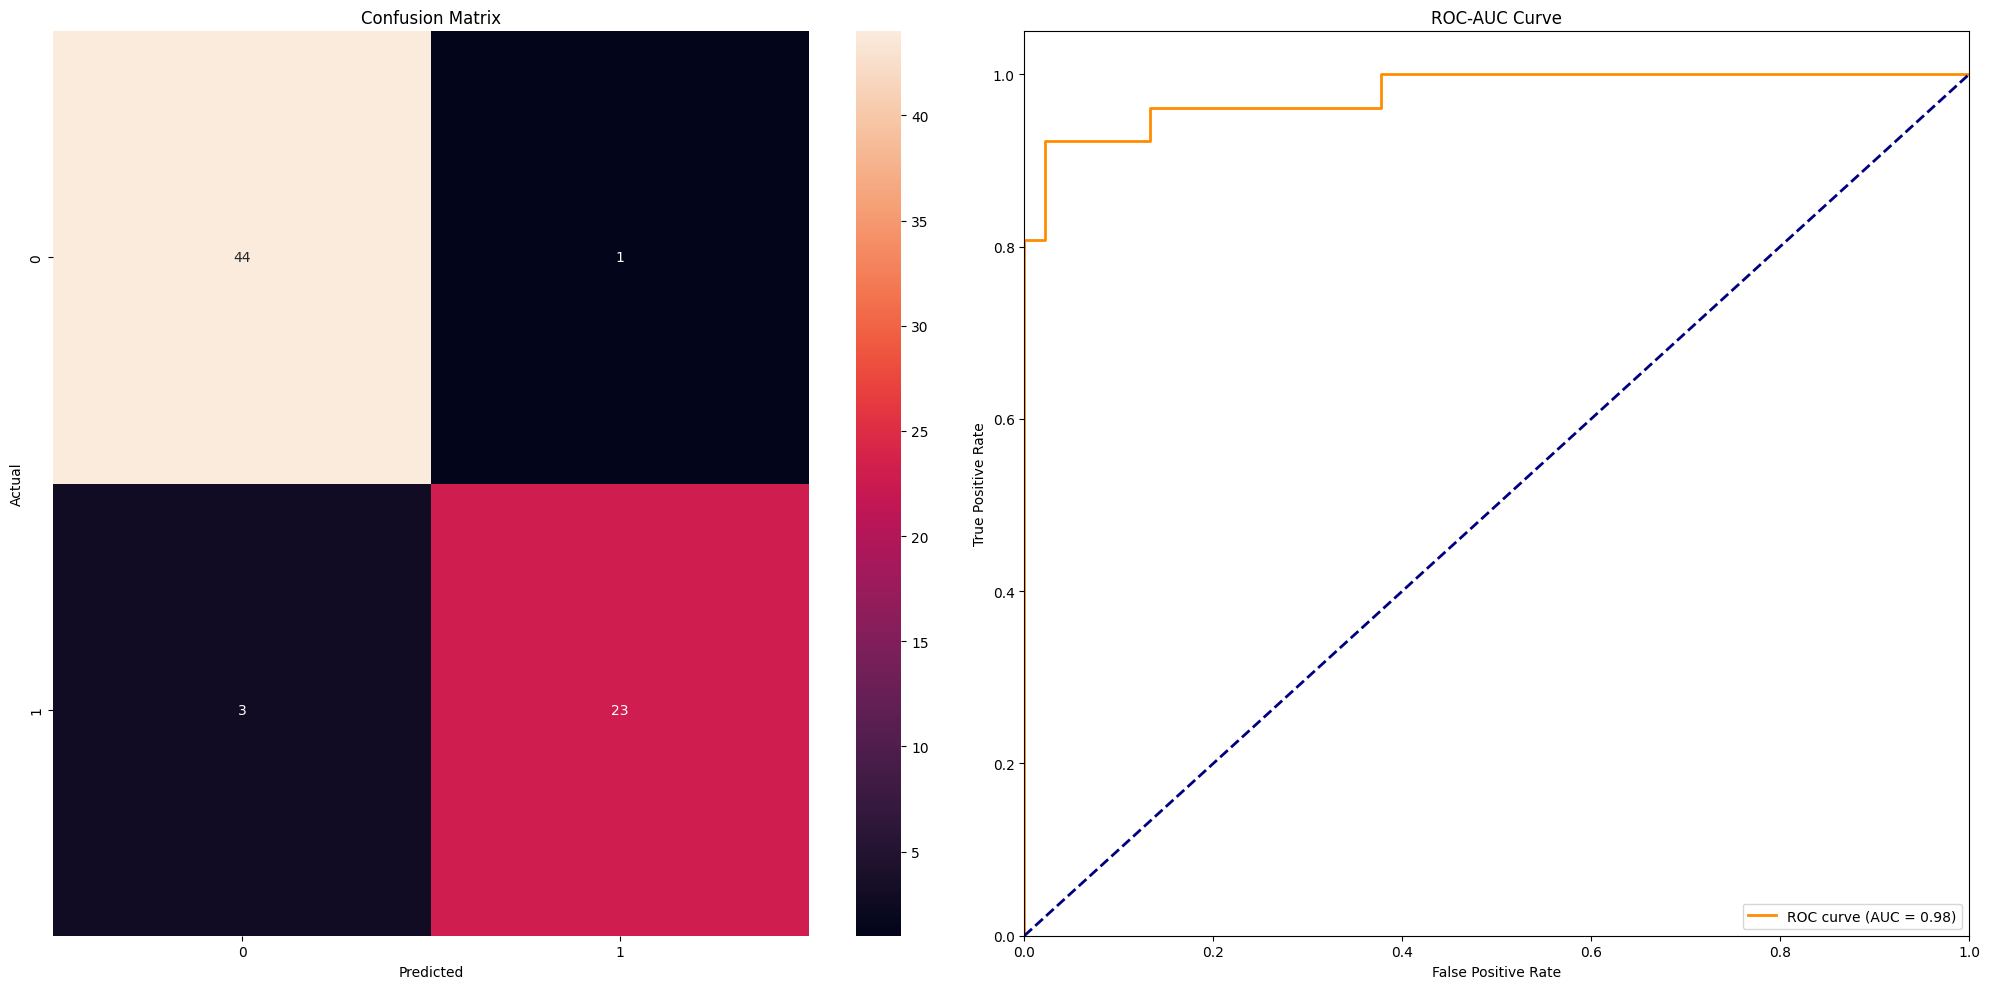

In [17]:
results_svm = classifier_selecting.optimize_classifier(X_train, X_test, y_train, y_test, 'svm')

print("\nBest Parameters:", results_svm['best_parameters'])
print("\nBest Cross-validation Score:", results_svm['best_score'])
print("\nFeature Importances:", results_svm['feature_importances'])
print("\nClassification Report:")
print(classification_report(y_test, results_svm['best_model'].predict(
    StandardScaler().fit_transform(X_test))))

In [ ]:
svm = SVC(**results_svm['best_parameters'])

sbs_svm = SequentialBackwardSelection(estimator=svm,
                                      min_features = 3,
                                      scoring_metric=accuracy_score,
                                      scale_features=True,
                                      verbose=True)
sbs_svm.fit(X_train, X_test, y_train, y_test)

In [18]:
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt


In [30]:
class BSpline(nn.Module):
    """Differentiable B-spline implementation in PyTorch"""
    def __init__(self, knots, degree=3):
        super(BSpline, self).__init__()
        self.knots = knots  # Knot vector
        self.degree = degree

    def basis(self, t, i, k):
        """Recursive De Boor basis function"""
        if k == 0:
            return torch.where((self.knots[i] <= t) & (t < self.knots[i+1]),
                              torch.ones_like(t), torch.zeros_like(t))

        d1 = (self.knots[i+k] - self.knots[i])
        d2 = (self.knots[i+k+1] - self.knots[i+1])

        # Avoid division by zero
        c1 = torch.zeros_like(t)
        mask1 = d1 > 0
        c1[mask1] = (t[mask1] - self.knots[i]) / d1 * self.basis(t[mask1], i, k-1)

        c2 = torch.zeros_like(t)
        mask2 = d2 > 0
        c2[mask2] = (self.knots[i+k+1] - t[mask2]) / d2 * self.basis(t[mask2], i+1, k-1)

        return c1 + c2

    def forward(self, t, control_points):
        n = len(control_points) - 1
        result = torch.zeros_like(t)

        for i in range(n + 1):
            result += control_points[i] * self.basis(t, i, self.degree)

        return result

class TorchCubicSpline(nn.Module):
    """Differentiable cubic spline implementation using PyTorch"""
    def __init__(self, x, y):
        super(TorchCubicSpline, self).__init__()
        self.x = x  # Control point x-coordinates (fixed)
        self.y = nn.Parameter(y)  # Control point y-coordinates (learnable)

        # Compute knot vector for cubic B-spline
        n = len(x)
        self.knots = torch.cat([
            x[0].repeat(3),
            x[1:-1],
            x[-1].repeat(3)
        ])

        self.bspline = BSpline(self.knots, degree=3)

    def forward(self, t):
        # Ensure t is clamped to domain
        t_clamped = torch.clamp(t, self.x[0], self.x[-1])

        # Evaluate B-spline
        return self.bspline(t_clamped, self.y)

class DifferentiablePchip(nn.Module):
    """Fully differentiable PCHIP (monotonic) spline in PyTorch"""
    def __init__(self, x, y):
        super(DifferentiablePchip, self).__init__()
        self.x = x  # Control point x-coordinates (fixed)
        self.y = nn.Parameter(y)  # Control point y-coordinates (learnable)
        self.n = len(x) - 1

    def forward(self, t):
        # Find the segment for each input t
        idx = torch.searchsorted(self.x, t) - 1
        idx = torch.clamp(idx, 0, self.n - 1)

        # Get x and y values for the segment
        x0 = self.x[idx]
        x1 = self.x[idx + 1]
        y0 = torch.gather(self.y, 0, idx)
        y1 = torch.gather(self.y, 0, idx + 1)

        # Normalize t within segment
        t_norm = (t - x0) / (x1 - x0)

        # Calculate slopes
        dy = self.y[1:] - self.y[:-1]
        dx = self.x[1:] - self.x[:-1]
        slopes = dy / dx

        # Enforce monotonicity by adjusting derivatives
        # Simplified PCHIP algorithm
        d = torch.zeros_like(self.y)
        for i in range(1, len(self.y)-1):
            if slopes[i-1] * slopes[i] > 0:
                # Same sign, use harmonic mean for monotonicity
                w1 = 2*dx[i] + dx[i-1]
                w2 = dx[i] + 2*dx[i-1]
                d[i] = (w1 + w2) / (w1/slopes[i-1] + w2/slopes[i])
            else:
                # Different signs or one is zero
                d[i] = 0

        # Handle endpoints
        d[0] = slopes[0]
        d[-1] = slopes[-1]

        # Get derivatives for segment
        d0 = torch.gather(d, 0, idx)
        d1 = torch.gather(d, 0, idx + 1)

        # Hermite basis functions
        h00 = 2*t_norm**3 - 3*t_norm**2 + 1
        h10 = t_norm**3 - 2*t_norm**2 + t_norm
        h01 = -2*t_norm**3 + 3*t_norm**2
        h11 = t_norm**3 - t_norm**2

        # Apply cubic Hermite interpolation with monotonic derivatives
        dx_segment = x1 - x0
        result = (h00 * y0 + h10 * dx_segment * d0 +
                 h01 * y1 + h11 * dx_segment * d1)

        return result

class PyTorchGradientSMPA(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.05, epochs=100, random_state=7, verbose=False,
                 lambda_reg=0.0001, patience=10, decay_factor=0.9, min_learning_rate=1e-6,
                 n_control_points=6, smoothing_factor=0.0001, spline_type='cubic',
                 device=None, track_history=False, optimizer_type='adam', scheduler_type='reduce_on_plateau'):
        self.learning_rate = learning_rate
        self.initial_learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.verbose = verbose
        self.lambda_reg = lambda_reg
        self.patience = patience
        self.decay_factor = decay_factor
        self.min_learning_rate = min_learning_rate
        self.n_control_points = n_control_points
        self.smoothing_factor = smoothing_factor
        self.spline_type = spline_type
        self.device = device if device is not None else ('cuda' if torch.cuda.is_available() else 'cpu')
        self.track_history = track_history
        self.optimizer_type = optimizer_type
        self.scheduler_type = scheduler_type

        if spline_type not in ['cubic', 'pchip']:
            raise ValueError("spline_type must be 'cubic' or 'pchip'")

        torch.manual_seed(random_state)
        np.random.seed(random_state)

    def _to_tensor(self, data, dtype=torch.float32):
        if isinstance(data, torch.Tensor):
            return data.to(self.device).to(dtype)
        elif isinstance(data, pd.Series):
            # Convert pandas Series to numpy array first
            return torch.tensor(data.values, dtype=dtype, device=self.device)
        elif isinstance(data, pd.DataFrame):
            # Convert pandas DataFrame to numpy array first
            return torch.tensor(data.values, dtype=dtype, device=self.device)
        elif isinstance(data, np.ndarray):
            # Handle numpy arrays
            return torch.tensor(data, dtype=dtype, device=self.device)
        else:
            # For any other array-like objects
            try:
                return torch.tensor(np.array(data), dtype=dtype, device=self.device)
            except:
                raise ValueError(f"Cannot convert {type(data)} to tensor: {data}")

    def _calculate_class_means(self, X, y):
        mask_1 = y == 1
        self.m1 = torch.mean(X[mask_1], dim=0)
        self.m0 = torch.mean(X[~mask_1], dim=0)

    def _initialize_control_points(self, X):
        n_features = X.shape[1] - 1  # All features except the last one
        self.spline_models = nn.ModuleList()

        for i in range(n_features):
            x_min, x_max = X[:, i].min().item(), X[:, i].max().item()
            control_x = torch.linspace(x_min, x_max, self.n_control_points, device=self.device)

            # Initialize y values around the mean of the target feature
            y_min, y_max = X[:, -1].min().item(), X[:, -1].max().item()
            y_mid = (self.m0[-1] + self.m1[-1]) / 2
            y_range = y_max - y_min
            control_y = torch.empty(self.n_control_points, device=self.device).uniform_(
                y_mid - y_range * 0.05, y_mid + y_range * 0.05
            )

            if self.spline_type == 'cubic':
                spline = TorchCubicSpline(control_x, control_y).to(self.device)
            else:
                spline = DifferentiablePchip(control_x, control_y).to(self.device)

            self.spline_models.append(spline)

        # Store initial control points for plotting or history
        self.initial_control_points = [(m.x.clone(), m.y.clone()) for m in self.spline_models]

    def _calculate_displacement(self, X):
        """Calculate total displacement as sum of spline contributions minus target feature"""
        total_spline = torch.zeros(X.shape[0], device=self.device)
        for i, spline in enumerate(self.spline_models):
            total_spline += spline(X[:, i])
        return X[:, -1] - total_spline

    def _update_pseudo_labels(self, X, y):
        m1_reshaped = self.m1.unsqueeze(0)
        m0_reshaped = self.m0.unsqueeze(0)
        m1_displacement = self._calculate_displacement(m1_reshaped)[0]

        self.class_1_pseudo = 1 if m1_displacement > 0 else -1
        self.class_0_pseudo = -self.class_1_pseudo

        return torch.where(y == 1,
                         torch.tensor(self.class_1_pseudo, device=self.device),
                         torch.tensor(self.class_0_pseudo, device=self.device))

    def _create_optimizer_and_scheduler(self):
        params = [p for spline in self.spline_models for p in spline.parameters()]
        if self.optimizer_type.lower() == 'adam':
            optimizer = torch.optim.Adam(params, lr=self.initial_learning_rate)
        else:
            optimizer = torch.optim.SGD(params, lr=self.initial_learning_rate)

        if self.scheduler_type.lower() == 'reduce_on_plateau':
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, mode='min', factor=self.decay_factor,
                patience=self.patience, min_lr=self.min_learning_rate, verbose=False
            )
        elif self.scheduler_type.lower() == 'step':
            scheduler = torch.optim.lr_scheduler.StepLR(
                optimizer, step_size=self.patience, gamma=self.decay_factor
            )
        else:
            scheduler = None

        return optimizer, scheduler

    def fit(self, X, y):
        if not set(np.unique(y)).issubset({0, 1}):
            raise ValueError("Labels must be 0 and 1")
        if X.shape[1] < 2:
            raise ValueError("At least 2 features required (one for spline, one as target)")

        X_tensor = self._to_tensor(X)
        y_tensor = self._to_tensor(y, dtype=torch.long)

        self._calculate_class_means(X_tensor, y_tensor)
        self._initialize_control_points(X_tensor)

        optimizer, scheduler = self._create_optimizer_and_scheduler()

        best_error = float('inf')
        best_control_ys = [spline.y.clone() for spline in self.spline_models]
        best_class_1_pseudo = None

        if self.track_history:
            self.error_history_ = []
            self.control_point_history = [self.initial_control_points]

        for epoch in range(self.epochs):
            pseudo_labels = self._update_pseudo_labels(X_tensor, y_tensor)
            displacements = self._calculate_displacement(X_tensor)

            errors = displacements * pseudo_labels <= 0
            error_count = errors.sum().item()

            if self.verbose and epoch % 5 == 0:
                current_lr = optimizer.param_groups[0]['lr']
                print(f"Epoch {epoch}: Errors = {error_count}, LR = {current_lr:.6f}")

            if error_count < best_error:
                best_error = error_count
                best_control_ys = [spline.y.clone() for spline in self.spline_models]
                best_class_1_pseudo = self.class_1_pseudo
                self.best_epoch = epoch

                if error_count == 0 and epoch > 10:
                    if self.verbose:
                        print(f"Perfect separation achieved at epoch {epoch}")
                    break

            if self.track_history:
                self.error_history_.append(error_count)
                self.control_point_history.append(
                    [(s.x.clone().cpu().numpy(), s.y.clone().detach().cpu().numpy())
                     for s in self.spline_models]
                )

            if error_count == 0:
                continue

            error_indices = torch.where(errors)[0]
            X_err = X_tensor[error_indices]
            y_err = y_tensor[error_indices]

            ti = torch.where(y_err == 1,
                           torch.tensor(1, device=self.device),
                           torch.tensor(-1, device=self.device))

            spline_values = torch.zeros(X_err.shape[0], device=self.device)
            for i, spline in enumerate(self.spline_models):
                spline_values += spline(X_err[:, i])

            loss = torch.mean(torch.relu(1.0 - ti * self.class_1_pseudo * (X_err[:, -1] - spline_values)))

            if self.lambda_reg > 0:
                smoothness_penalty = 0
                for spline in self.spline_models:
                    y_diff = spline.y[1:] - spline.y[:-1]
                    x_diff = spline.x[1:] - spline.x[:-1]
                    smoothness_penalty += torch.mean((y_diff / x_diff)**2)
                loss += self.lambda_reg * smoothness_penalty

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if scheduler is not None:
                if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                    scheduler.step(error_count)
                else:
                    scheduler.step()

                if optimizer.param_groups[0]['lr'] <= self.min_learning_rate:
                    if self.verbose:
                        print(f"Minimum learning rate reached at epoch {epoch}")
                    break

        for spline, best_y in zip(self.spline_models, best_control_ys):
            spline.y.data = best_y
        self.class_1_pseudo = best_class_1_pseudo

        return self

    def predict(self, X):
        X_tensor = self._to_tensor(X)
        displacements = self._calculate_displacement(X_tensor)
        predictions = torch.where(displacements > 0,
                                torch.tensor(1 if self.class_1_pseudo > 0 else 0, device=self.device),
                                torch.tensor(0 if self.class_1_pseudo > 0 else 1, device=self.device))
        return predictions.cpu().numpy()

    def plot_convergence(self, figsize=(10, 4)):
        if not self.track_history or not hasattr(self, 'error_history_'):
            print("Convergence plotting requires track_history=True and a fitted model.")
            return None

        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(self.error_history_, 'b-', label='Errors')
        ax.set_title('Error Convergence')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Number of Errors')
        ax.grid(True)
        ax.legend()
        plt.tight_layout()
        return fig

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
def reorder_least_correlated_feature(X, standardize=True, feature_order=None):
    """
    Reorder X based on correlation or a provided feature order.

    Parameters:
    - X: numpy array or pandas DataFrame
    - standardize: bool
    - feature_order: list, optional order from training set (default: None, compute from X)

    Returns:
    - X_reordered, feature_order (if computed)
    """
    is_dataframe = isinstance(X, pd.DataFrame)
    if is_dataframe:
        column_names = X.columns
        X_np = X.to_numpy()
    else:
        X_np = np.asarray(X)

    if feature_order is None:
        if standardize:
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X_np)
        else:
            X_scaled = X_np.copy()

        corr_matrix = np.abs(np.corrcoef(X_scaled, rowvar=False))
        n_features = X_np.shape[1]
        avg_corr = (np.sum(corr_matrix, axis=1) - np.diag(corr_matrix)) / (n_features - 1)
        target_idx = np.argmin(avg_corr)
        feature_order = list(range(n_features))
        feature_order.pop(target_idx)
        feature_order.append(target_idx)

    if is_dataframe:
        X_reordered = X.iloc[:, feature_order]
    else:
        X_reordered = X_np[:, feature_order]

    return X_reordered, feature_order

X_train_reordered, feature_order = reorder_least_correlated_feature(X_train)
X_test_reordered, _ = reorder_least_correlated_feature(X_test, feature_order=feature_order)

In [43]:
import warnings
warnings.filterwarnings("ignore", message="The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.")

In [47]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [48]:
param_grid = {
                'learning_rate': [0.01, 0.001, 0.02],           # Range to balance step size
                'epochs': [300],                         # Enough iterations to converge
                'n_control_points': [5, 8, 9, 15, 20],              # More points to capture wiggles
                'spline_type': ['cubic'],            # Test both spline types
                'patience': [15],                             # Fixed patience for consistency
                'decay_factor': [0.99],                        # Fixed decay for simplicity
                'min_learning_rate': [1.e-6],
                'smoothing_factor': [0.00000001, 0.000001]

}
smpa = PyTorchGradientSMPA(random_state=12, track_history=True, device='cpu')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
grid_search = GridSearchCV(smpa, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=3)
grid_search.fit(X_train_reordered, y_train)

grid_search.best_estimator_.plot_convergence()
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[CV 4/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=cubic;, score=0.632 total time= 1.9min
[CV 3/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=cubic;, score=0.686 total time= 2.0min
[CV 3/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-06, spline_type=cubic;, score=0.606 total time= 2.6min
[CV 1/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=cubic;, score=0.821 total time= 2.7min
[CV 5/5] END decay_factor=0.99, epochs=300, learning_rate=0.01, min_learning_rate=1e-06, n_control_points=5, patience=15, smoothing_factor=1e-08, spline_type=cubic;, score=0.769 total time= 3.0min
[CV 4/5] END de

KeyboardInterrupt: 

In [45]:
cr = classification_report(y_test, grid_search.best_estimator_.predict(X_test_reordered))
print("Classification report \n", cr)
print("Best CV score: ", grid_search.best_score_)

Classification report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.92      0.85      0.88        26

    accuracy                           0.92        71
   macro avg       0.92      0.90      0.91        71
weighted avg       0.92      0.92      0.91        71

Best CV score:  0.8420574609429099


In [46]:
grid_search.best_params_

{'decay_factor': 0.99,
 'epochs': 300,
 'learning_rate': 0.01,
 'min_learning_rate': 1e-06,
 'n_control_points': 9,
 'patience': 15,
 'smoothing_factor': 1e-06,
 'spline_type': 'pchip'}